# Assignment 5

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Adriel Naranjo"
STUDENT_ID = "1676622"

## Question 1: GRU/LSTM

We've seen both LSTM and GRU cells as building blocks for RNNs.

Here is a reminder of each of their corresponding architectures:

![Pic](https://drive.google.com/uc?id=1INZQkDev_8rdFxOT9hfAiPWJRT6-N82S)

### Question 1.i) What are the major differences between each?


Lets consider the following equations before I start explaining the major differences formally here is some equations I want to reference. 

Equations:

    1) LSTM: C_t = u_t * C`_t + f_t * C_t-1       

    2) GRU: C_t = u_t * C`_t + (1- u_t) * C_t-1

    3) f_t + u_t = 1

   
Lets now consider the behavior of GRU when presented with an input. 


    if we use the input value u_t to update the value at time t:
        then unit will not use value in memory cell to compute C_t.
         f_t = (1 - u_t) = 0 

    elif we dont use the input to update the value at time t:
        then unit uses what is in memory (prev. time step) to update
         f_t = (1 - u_t) = 1


So it can be seen that the major difference betweeen these two is how the values at time t are calculated to compute C_t.

LSTM uses more parameters/infomation being that it considers both the input and what is in memory whereas GRU either considers only the input value or only the value that is in memory/previous time step value. 

Main point: 

LSTM has three gates: input, output and forget gate whereas GRU has two: reset and update gates.


### Question 1.ii) What are the major advantages of each?

      GRU ADVANTAGES:
          - less training parameters needed
          - less memory needed for training 
          - lightweight so executes and trains quickly 
          - helps with vanishing gradient 
          - helps control flow of incoming data  

      LSTM ADVANTAGES:
          - Training accuracy tends to be high on large sequences of data
          - A memory capacity
          - Maintains constant error flow in backpropogation process
          - solves vanishing gradient 
          - helps control flow of incoming data 
  



### Question 1.iii) What are the major disadvantages of each?

      GRU DISADVANTAGES:
          - every time we consider the input we must remember to flush the memory. 
          - may produces inaccurate results 
          - may be slow to converge 
          - may be slow to learn 
          - may underfit
          - limited in memory

      LSTM DISADVANTAGES:
          - could take long to train due to many parameters
          - may overfit 
          - may require a lot of memory because parameters to train  

## Question 2: United States Corona Virus Cases Forecast

### Question 2.i) Import data and get data for United States
We will be using a subset of Corona Virus dataset available at [Kaggle.com](https://www.kaggle.com/). The dataset is rather comprehensive so for our predictions we will use the number of cases in the United States from the 1 January 2020 (when this record starts) to 14 July 2020 (the last time this dataset was updated). The numbers of cases is cumulative. \\

You may want to switch to GPU in "Runtime"->"Change Runtime type" for this assignment.

** Note: The full data set is available at https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv

In [2]:
# Import and get data
import numpy as np
import pandas as pd
!wget "https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv"

--2020-09-20 22:02:56--  https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv
Resolving people.ucsc.edu (people.ucsc.edu)... 128.114.119.88
Connecting to people.ucsc.edu (people.ucsc.edu)|128.114.119.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178638 (174K) [text/csv]
Saving to: ‘time_series_covid_19_confirmed.csv’

time_series_covid_1 100%[===================>] 174.45K  --.-KB/s    in 0.1s    

2020-09-20 22:02:57 (1.72 MB/s) - ‘time_series_covid_19_confirmed.csv’ saved [178638/178638]



In [3]:
# Load data
dataframe = pd.read_csv("time_series_covid_19_confirmed.csv")

Let's look at the data

In [4]:
dataframe.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541


This data set is somewhat scattered. Some of rows represent an entire country's case data while some country's case data is split up into province. But we want to extract US case data.

In [5]:
# Extract US corona data and drop province/state - Long.
US_dataframe = dataframe[dataframe['Country/Region'] == 'US']
US_dataframe.head()
US_dataframe = US_dataframe.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [6]:
US_dataframe.head()
# print(US_dataframe.shape)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


Now we have a case dataframe containing the US case numbers ranging from 22 January 2020 to 14 July 2020. However, lets only consider the data from 2 March 2020 when the total number of Corona virus cases in the US exceeded 50,000.

In [7]:
# Cut off first 40 days of data
US_dataframe = US_dataframe.iloc[:, 40:]
# print(US_dataframe)
print(US_dataframe.shape)

US_dataframe.head()

(1, 135)


,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,53,73,104,174,222,337,451,519,711,1109,1561,2157,2870,2968,4360,6141,8917,14157,19479,25825,33761,43850,54112,66055,84091,102276,122069,141205,162707,188724,214205,244610,276547,309699,337573,367215,397992,429686,464442,497943,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


#### Question 2.i.a) Plot the cases for the US 
Using seaborn.linepolot, Plot the cases in the US in a Number of Cases vs. Day plot.
**Hint: you may need np.linspace to create an x-axis. You will also need to cast US_dataframe into an np.array using US_dataframe.values. You will likely need to call reshape ino order to transform the new np.array into shape (135,)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


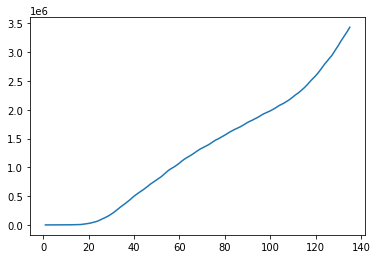

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(x = np.linspace(1,135,135), y = US_dataframe.values.reshape(-1))




#### Question 2.i.b) Analyzing the plot
If you plotted the data correctly, it looks like there are some slight trends in the plot. Recalling that the data starts on 22nd of January, describe some of the trends that you may see. When did cases start to raise dramatically? Did the total number of cases ever seem to stop growing? Add approximate dates.

The trend here is that the number of Corona virus cases is growing at a nearly exponential rate. 

From 3/2/20 to 3/17/20 (first 15 days of our data) the rate of growth was at a low plateau then on 3/18/20 the rate of growth began to rise thus showing a trend of how the day are are going at a exponential rate. 

Later on starting around 4/15/20 the curve slows down around 5/15/20 then the rate of growth again goes up and continues exponentially until the end of our data dates 7/14/20 (last week) 

### Question 2.ii) Analyzing the plot
As an aside, disease spread often occur on an exponential scale. Therefore, we will analyze the data in the logarithmic scale. We'll apply the np.log function to the dataframe below then plot the transformed data.

In [9]:
# Apply natural log to the US_dataframe
df = US_dataframe.apply(np.log)

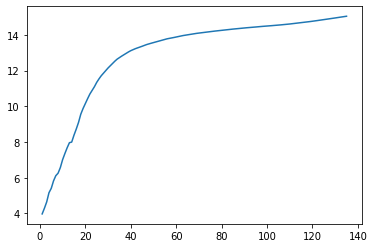

In [10]:
sns.lineplot(x = np.linspace(1,135,135), y = df.values.reshape(-1))

The plot above shows that on a logarithmic scale, the cumulative number of cases began to level off around days 20-30 but towards day 120 we see that the growth in the number of cases has begun to tick upwards again. Now we will do our time series prediction on the US_dataframe.

#### Question 2.iii.a) Apply MinMaxScaler to US_dataframe
Recall [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. Use it to scale the data for our analysis. 
** Hint: You will need to call .transpose inorder to comply with required inputshape (n,1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

US_data = np.transpose(US_dataframe)
scaler = MinMaxScaler()
US_data = scaler.fit_transform(US_data)



#### Question 2.iii.b) Split data into train and test for time series prediction
We will begin by splitting US_dataframe into train and test data. Begin with split = 0.7.

In [12]:
# Use this function to create train/test split
def train_test_split(arr: np.array, split = 0.70):
    train_size = int(len(arr) * split)
    test_size = len(arr) - train_size
    US_train, US_test = arr[0:train_size,:], arr[train_size:len(arr),:]
    print("train.shape: ", US_train.shape)
    print("test.shape: ", US_test.shape)
    return (US_train, US_test)

In [13]:
# Call train_test_split on US_data
train, test = train_test_split(US_data)



train.shape:  (94, 1)
test.shape:  (41, 1)


Now we create the dataset time_step determines how many days back the model will look to generate a new prediction. Begin with time_step=2

In [14]:
# Generate a dataset where X[n] contains the readings for the 'time_step' previous days 
# and y contains the reading for today.

def create_dataset(dataset, time_steps=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_steps-1):
		a = dataset[i:(i+time_steps), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_steps, 0])
	return np.array(dataX), np.array(dataY)

In [15]:
# Choose the number of time steps that the model "looks back"
steps = 4

# Create your training dataset.
X_train, y_train = create_dataset(train, time_steps=steps)
## Create your test dataset.
X_test, y_test = create_dataset(test, time_steps=steps)

In [16]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))




#### Question 2.iii.c) LSTM Architecture
Next build the LSTM model. We don't have a lot of data so build the model with:
<ul>
<li>Input Layer shape of size (1,time_steps)</li>
<li>An LSTM Laywer with 10 units</li>
<li>Dense Layer with 1 neuron</li>

Then use 'mean_squared_error' loss with an optimizer. Run model.summary(), compile, then fit the model. Train for 100 epochs using X_train, y_train, validation_split = 0.2


In [17]:
import matplotlib.pyplot as plt
import pandas
import math
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from keras.losses import mean_squared_error


  
model = Sequential() 

model.add(LSTM(units=10, input_shape=(1,4)))

model.add(Dense(units=1))
# model.add(Dropout(0.2))




opt = Adam()
model.compile(optimizer = opt,
              loss = mean_squared_error,
              metrics = ['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                600       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fit model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
3/3 [==============================] - 0s 161ms/step - loss: 0.0762 - accuracy: 0.0000e+00 - val_loss: 0.2924 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0720 - accuracy: 0.0000e+00 - val_loss: 0.2783 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0676 - accuracy: 0.0000e+00 - val_loss: 0.2647 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0636 - accuracy: 0.0000e+00 - val_loss: 0.2514 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0599 - accuracy: 0.0000e+00 - val_loss: 0.2384 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.0000e+00 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0525 - accuracy: 0.0000e+00 - val_loss: 0.2

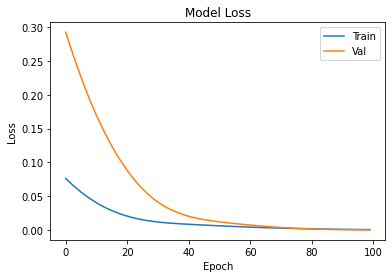

In [19]:
def plot_losses(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()
def plot_accuracies(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'])
    plt.show()


plot_losses(history)

Lets look at our predictions

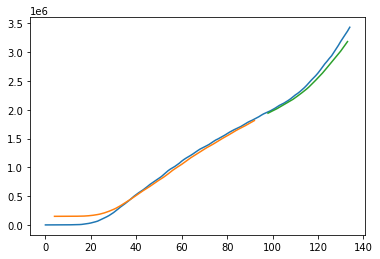

In [20]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_train])

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(US_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[steps:len(trainPredict)+steps, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(US_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(steps*2)+1:len(US_data)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(US_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The Blue line is the real number of cases. the Orange line is the train_predicted number of cases, and the green line is the test_predicted number of cases.

#### Question 2.iii.d)
Comment on the fit of your prediction? Are there any interesting correlations between the cumulative case numbers that we plotted above and your forecast?

The prediction line that my model produced has a similar trend to the original set of case numbers. The difference I see between is that the prediction I made is a little off. I feel this has to do with have a somewhat small set of data to train on. The trend is also still roughly exponential. 

#### Question 2.iii.e)
Re-run Question 2.iii.a to 2.iii.c but with split = 0.9. Was your prediction closer to the actual trend? Explain why or why not the prediction was closer to the real trend.

My model performed terribly when changing the split to 0.9. I am thinking this is because my model didnt train on enough data and when it was time to validate the model there was a bunch of data and the model didnt really know what to do with all of it. The loss the model experienced was constant and this may be further evidence that this model had trouble understanding the data incoming with this kind of split.  

#### Question 2.iii.f)
This time, try adjusting the parameters time_steps and choose a split to your liking. See if you can get your model to do anything else that is interesting. Explain the changes that you made.

This time I did set split = 0.1 giving my model a lot of data to train on so that when its time to validate my model it will be able to grasp what to do with it. Additionally I changed the time_steps = 4. I did to open up the window of how many days we will look back in order to make the prediction. 

The results of my model I was very happy with because I was able to fit the line pretty good meaning my model was able to capture a way to model further prediction on the number of corona virus cases. I was able to get this results most of the time but i think there are some bugs in COLAB or this assignment because sometimes my results vary which is strange. 

This was a real cool data set to work on! 

## Question 3: Denoising Autoencoder
Now we will build a Denoising auto-encoder to denoise smiley face pictures gathered at the [SMILEsmileD](https://github.com/hromi/SMILEsmileD) archive.
<center><img src="https://people.ucsc.edu/~mbriden/cse140/smiles.png" width="300"></center>

### Question 3.i) Import and display sample images
Let us begin by getting our imports and downloading the dataset.

In [21]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
%matplotlib inline

In [22]:
# Download data
url = 'https://github.com/hromi/SMILEsmileD/archive/master.zip'
request.urlretrieve(url, 'data.zip')
zipfile.ZipFile('data.zip').extractall()

In [23]:
# Open images
x_pos = []
base_path = 'SMILEsmileD-master/SMILEs/'
positive_smiles = base_path + 'positives/positives7/'
negative_smiles = base_path + 'SMILEsmileD-master/SMILEs/negatives/negatives7/'
for img in os.listdir(positive_smiles):
    x_pos.append(mpimg.imread(positive_smiles + img))

# Change into np.array and scale to 255. which is max
x_pos = np.array(x_pos)/255.

# Reshape
x_pos = x_pos.reshape(len(x_pos),64,64,1)

# Shuffle the images in case there was some underlying order
np.random.shuffle(x_pos)

# Split into test and train set, but we will use keras built in validation_size
x_pos_train = x_pos[int(x_pos.shape[0]* .20):]
print("x_pos_train.shape:",x_pos_train.shape)
x_pos_train_noisy = x_pos_train + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_train.shape)

x_pos_test = x_pos[:int(x_pos.shape[0]* .20)]
print("x_pos_test.shape:",x_pos_test.shape)
x_pos_test_noisy = x_pos_test + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_test.shape)

x_pos_train.shape: (2952, 64, 64, 1)
x_pos_test.shape: (738, 64, 64, 1)


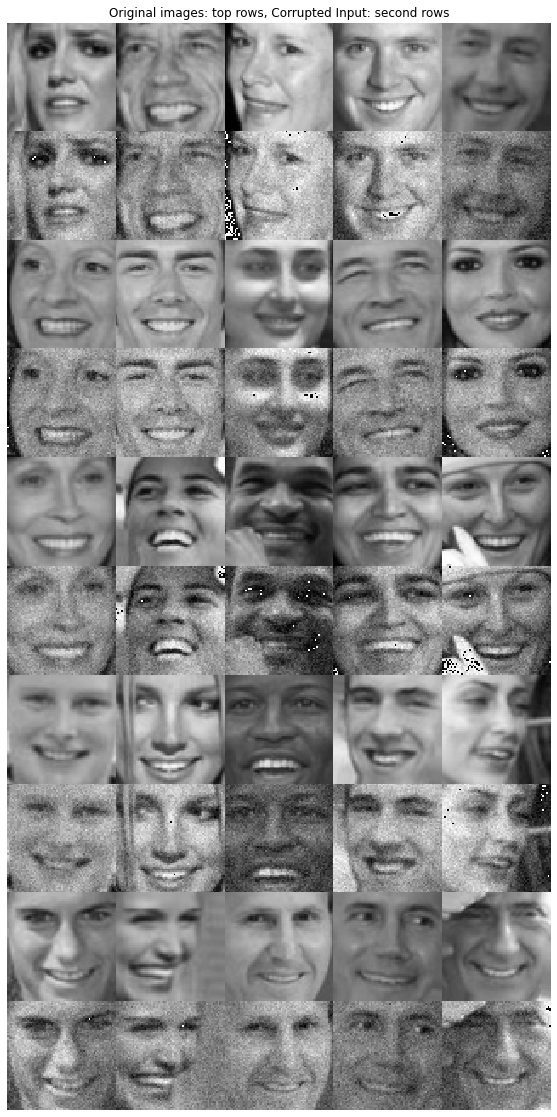

In [24]:
# Display the 1st 5 original and corrupted
image_size = 64
rows, cols = 5, 5
num = rows * cols
imgs = np.concatenate([x_pos_train[:num], x_pos_train_noisy[:num]])
imgs = imgs.reshape((rows * 2, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 2, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: second rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

### Question 3.ii) Build the Model


#### Question 3.ii.a) Build an Encoder Model
Above are the images before and after being corrupted. Now we will build the autoencoder. Build the Encoder with the following requirements:
<ul>
<li>Input Layer shape of size (64,64,1)</li>
<li>Latent_dimension of 16</li>
<li>Use two CNN layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 dense layer of size Latent_dimension</li>
</ul>

Your model should have an input size of (64,64,1) and an output size of (None,16).

** hint: hint: refer to the last class exercise on autiencoders.

In [25]:
# Build the encoder architecture here

# Network parameters
image_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
latent_dim = 16
# Encoder/Decoder number of CNN layers and filters per layer
layer_filters = [32, 64]


inputs = Input(shape=image_shape, name='encoder_input')
x = inputs
# Stack of Conv2D blocks
# Note:
# Use Batch Normalization before ReLU on deep networks
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

# Shape info needed to build Decoder Model
shape = K.int_shape(x)

# Generate the latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)




In [26]:
# Print model summary
encoder = Model(inputs, latent, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                262160    
Total params: 280,976
Trainable params: 280,976
Non-trainable params: 0
_________________________________________________________________


#### 3.ii.b) Build an Dencoder Model
Next we will build the decoder model. This model should have
<ul>
<li>Input Layer shape of size (latent_dimension,)</li>
<li>1 dense layer with the size of 16*16*64</li>
<li>Two transposed convolution layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 conv2dTranspose layer with 1 filter and kernel size of 3</li>
<li>1 Output layer with sigmoid activation</li>
</ul>

In [27]:
# Build the decoder architecture here

# Build the Decoder Model

latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# Stack of Transposed Conv2D blocks

for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

x = Conv2DTranspose(filters=1,
                    kernel_size=kernel_size,
                    padding='same')(x)

outputs = Activation('sigmoid', name='decoder_output')(x)

# Instantiate Decoder Model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16384)             278528    
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 64, 64, 1)         289       
_________________________________________________________________
decoder_output (Activation)  (None, 64, 64, 1)         0   

#### Question 3.ii.c) Build Encoder + Dencoder Model
Now combine encoder and decoder models and build the autoencoder architecture.

In [28]:
# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 64, 64, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                280976    
_________________________________________________________________
decoder (Functional)         (None, 64, 64, 1)         334209    
Total params: 615,185
Trainable params: 615,185
Non-trainable params: 0
_________________________________________________________________


Call compile using 'mse' loss with an optimizer (adam is probably the safest one to use). Call autocoder.fit with x = x_pos_train_noisy, y = x_pos_train, validation_data = (x_pos_test, x_pos_test_noisy). 

In [ ]:
# Compile
autoencoder.compile(loss='mse', optimizer='adam')

# Train the autoencoder
autoencoder.fit(x_pos_train_noisy,
                x_pos_train,
                validation_data=(x_pos_test_noisy, x_pos_test),
                epochs=10,
                batch_size=batch_size)

Epoch 1/10
24/24 [==============================] - 1s 39ms/step - loss: 0.0275 - val_loss: 0.0247
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0235 - val_loss: 0.0213
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0172 - val_loss: 0.0136
Epoch 4/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0123 - val_loss: 0.0118
Epoch 5/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 7/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 8/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 10/10
 7/24 [=======>......................] - ETA: 0s - loss: 0.0080

### Question 3.iii) Print denoised images (predictions)

In [ ]:
# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_pos_test_noisy)
# Display the 1st 4 corrupted and denoised images
rows, cols = 4, 4
num = rows * cols
imgs = np.concatenate([x_pos_test[:num], x_pos_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

Comment on how your model has performed. Was your model able to denoise the image successfully? Is there anything unexpected results about the images? MSE error is known to smooth an image too much, did your model suffere the same result?

I believe the model did a good job denoising the images. Not the best job though..

An unexpected result is that the images came out blurry. After further investigation this may have to do with the dimensions of the latent space being too small and that the mse is a mean of a sort so the output is 'smoothed' or in my own words, dulled. This may show that using this type of model will produce images that dont fully extract the details of the features in the image so when it is time for the image to be reconstructed all the features may not be there as expected. 

I read more on this topic and found that a Generative Adversial Networks may produce better quality reconstruction after encoding and decoding noisey images, will probably look into that more..



